# Perform analysis on a MOOC dataset

Github Link : https://github.com/elleros/courseraforums

Paper Link : http://www2.cs.uh.edu/~gnawali/papers/coursera-iri2014.pdf
    
The aim of this task is to
- Read the paper and understand it.
- Download the dataset, load it up to a Jupyter notebook using pandas.
- Draw figures 1-6 on the notebook using seaborn (replicate all the visualization performed in the paper)

### Import all the Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


warnings.filterwarnings("ignore", category=RuntimeWarning) 

### Load the CSV files and print it

In [2]:
course_information = pd.read_csv('course_information.csv')
course_posts = pd.read_csv('course_posts.csv')
course_threads = pd.read_csv('course_threads.csv')

In [3]:
course_information[:5]

,name,course_id,weeks,hours,start_date,end_date,type,language,num_threads,mandatory_posts,num_users
0,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,103
1,Asset Pricing,assetpricing-001,9,12.5,9/30/2013,NaN,Q,E,673,NaN,392
2,Automata,automata-002,6,9,11/4/2013,NaN,Q,E,429,NaN,493
3,Big Data in Education,bigdata-edu-001,8,7,10/24/2013,NaN,?,E,585,NaN,710
4,Bioinformatics Algorithms (Part 1),bioinformatics-001,12,9,11/4/2013,1/27/2014,Q,E,1160,NaN,941


In [4]:
course_posts[:5]

,post_id,thread_id,course_id,parent_id,order,user_id,user_type,post_time,relative_t,votes,num_words,forum_id
0,3,2,analysenumerique-001,0,1,0,Anonymous,1358942448,-0.404753,2,23,13
1,4,2,analysenumerique-001,0,2,3992067770,Instructor,1359109877,-0.373994,0,15,13
2,7,2,analysenumerique-001,0,3,3992067770,Instructor,1359129778,-0.370338,1,9,13
3,8,2,analysenumerique-001,0,4,0,Anonymous,1359130161,-0.370267,0,2,13
4,15,2,analysenumerique-001,0,5,3992067770,Instructor,1359214077,-0.354851,0,31,13


In [5]:
course_threads[:5]

,thread_id,course_id,og_forum,og_forum_id,parent_forum,parent_forum_id,forum_chain,depth,num_views,num_tags,forum_id
0,2,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,277,0,13
1,3,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,572,0,13
2,4,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,196,0,13
3,7,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,135,0,13
4,8,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,188,0,13


## Graph 1

* sort the value in ascending order
* plot a barplot for Number of threads vs. course identifier

In [6]:
course_information_new = course_information.sort_values('num_threads',ascending=False)

Text(0.5, 0, 'Course')

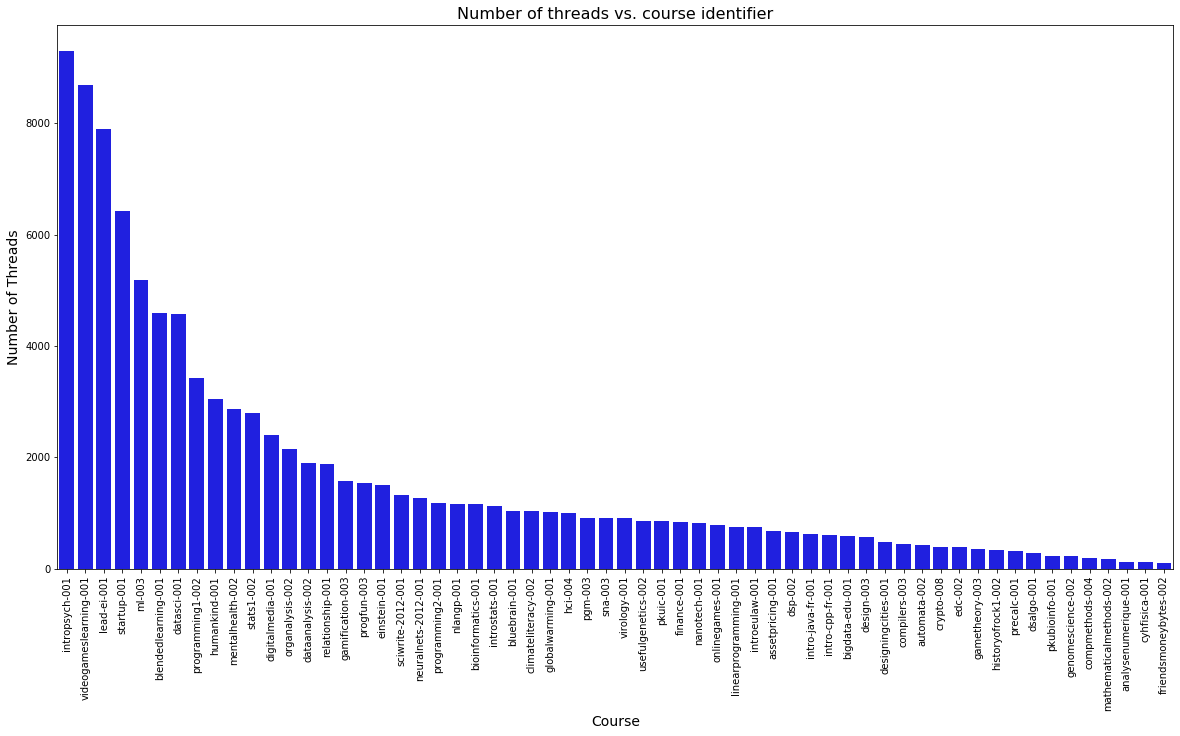

In [7]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x= 'course_id',y = 'num_threads', data = course_information_new, color = 'b',ax=ax)
plt.title("Number of threads vs. course identifier", size=16)
plt.xticks(rotation=90, horizontalalignment="center")
plt.ylabel("Number of Threads", size=14)
plt.xlabel("Course", size=14)

## Graph 2

* Merge the information and posts dataframes.
* Create a new dataframe by grouping the course_id and num of users and counting the post id
* create the log-log plots

## Issues faced

* could not replicate the graphs
* Not sure if the variables used are correct or not.

In [8]:
info_posts = pd.merge(course_information, course_posts, how='inner', on=['course_id'])
info_posts[:5]

,name,course_id,weeks,hours,start_date,end_date,type,language,num_threads,mandatory_posts,...,thread_id,parent_id,order,user_id,user_type,post_time,relative_t,votes,num_words,forum_id
0,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,2,0,1,0,Anonymous,1358942448,-0.404753,2,23,13
1,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,2,0,2,3992067770,Instructor,1359109877,-0.373994,0,15,13
2,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,2,0,3,3992067770,Instructor,1359129778,-0.370338,1,9,13
3,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,2,0,4,0,Anonymous,1359130161,-0.370267,0,2,13
4,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,2,0,5,3992067770,Instructor,1359214077,-0.354851,0,31,13


In [9]:
info_posts_fig2 = info_posts.groupby(['course_id','num_users'])['post_id'].count().to_frame().reset_index()
info_posts_fig2 = info_posts_fig2.sort_values('post_id',ascending=False)
info_posts_fig2[:5]

,course_id,num_users,post_id
35,lead-ei-001,10447,81373
55,startup-001,8592,45947
33,intropsych-001,11989,45776
29,humankind-001,4371,43968
39,ml-003,6368,39654


Text(0.5, 0, 'Thread Size(Number of Messages)')

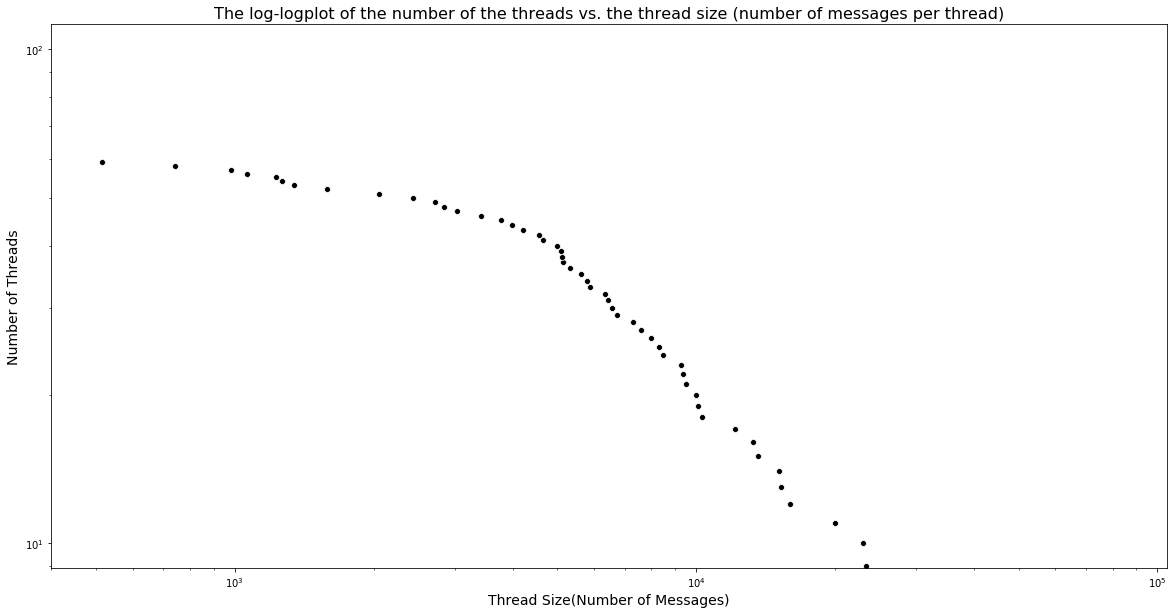

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x="post_id", y="course_id",data=info_posts_fig2,color = 'black',ax=ax)
plt.yscale('log')
plt.xscale('log')
plt.title("The log-logplot of the number of the threads vs. the thread size (number of messages per thread)", size=16)
plt.ylabel("Number of Threads", size=14)
plt.xlabel("Thread Size(Number of Messages)", size=14)

Text(0.5, 0, 'Thread Size(Number of Messages)')

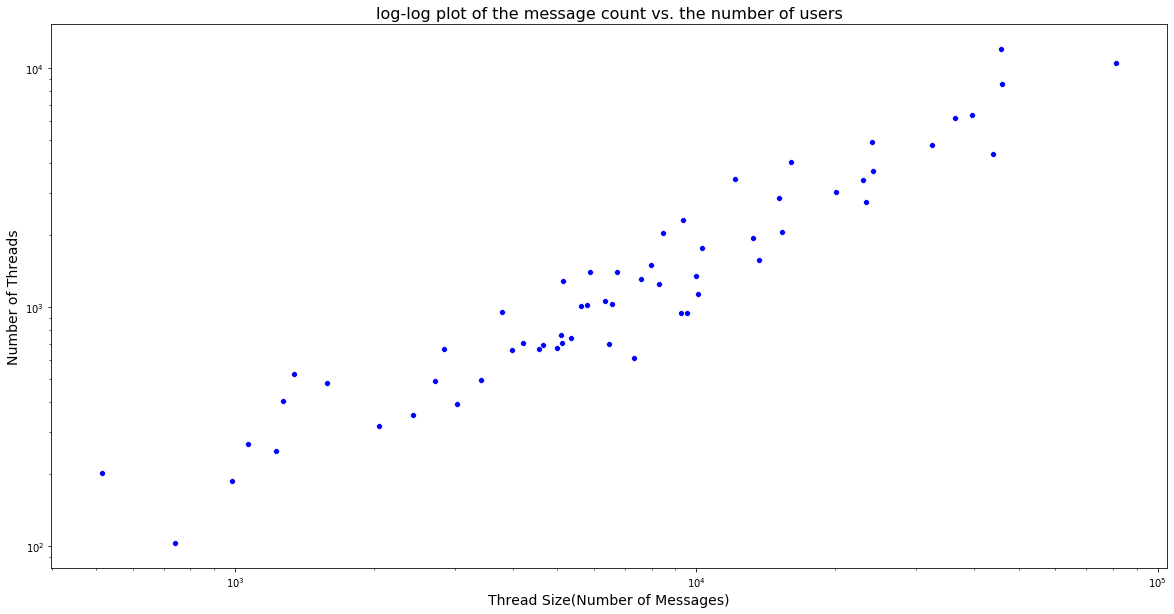

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x="post_id", y="num_users",data=info_posts_fig2,color = 'b',ax=ax)
plt.yscale('log')
plt.xscale('log')
plt.title("log-log plot of the message count vs. the number of users", size=16)
plt.ylabel("Number of Threads", size=14)
plt.xlabel("Thread Size(Number of Messages)", size=14)

## Graph 3

* create a new dataframe by grouping the values on basis of user type

In [12]:
course_posts_new = course_posts.groupby('user_type')['post_id'].count().to_frame().reset_index()
course_posts_new = course_posts_new.sort_values('post_id',ascending=False)

Text(0.5, 0, 'Number of Threads')

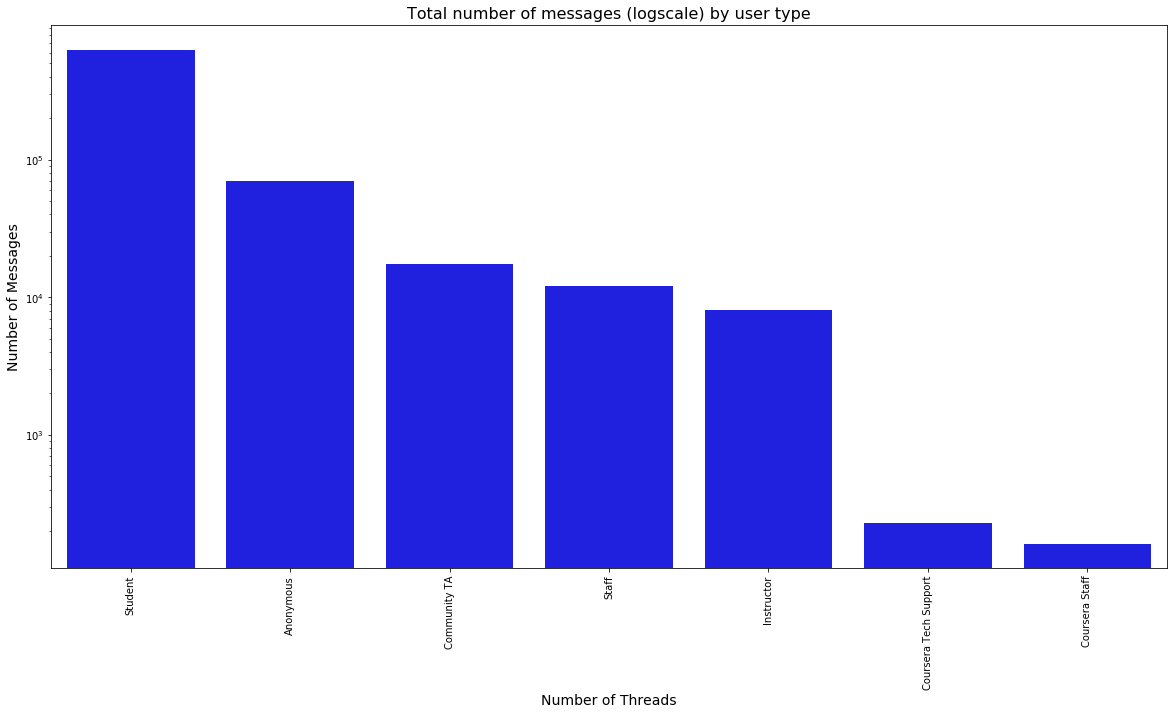

In [13]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x= 'user_type',y = 'post_id', data = course_posts_new, color = 'b',ax=ax)
plt.yscale('log')
plt.xticks(rotation=90, horizontalalignment="center")
plt.title("Total number of messages (logscale) by user type", size=16)
plt.ylabel("Number of Messages", size=14)
plt.xlabel("Number of Threads", size=14)

In [14]:
info_posts[:5]

,name,course_id,weeks,hours,start_date,end_date,type,language,num_threads,mandatory_posts,...,thread_id,parent_id,order,user_id,user_type,post_time,relative_t,votes,num_words,forum_id
0,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,2,0,1,0,Anonymous,1358942448,-0.404753,2,23,13
1,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,2,0,2,3992067770,Instructor,1359109877,-0.373994,0,15,13
2,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,2,0,3,3992067770,Instructor,1359129778,-0.370338,1,9,13
3,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,2,0,4,0,Anonymous,1359130161,-0.370267,0,2,13
4,Analyse Numérique pour Ingénieurs,analysenumerique-001,9,5,2/18/2013,NaN,Q,FR,119,NaN,...,2,0,5,3992067770,Instructor,1359214077,-0.354851,0,31,13


## Graph 4

* Filter the dataframe on basis of the Assignments and groups
* Rename the values in the forum_id column

In [15]:
info_posts_new = info_posts.loc[((info_posts['forum_id'] == 3)|(info_posts['forum_id'] == 4))]
info_posts_new['forum_id'] = info_posts_new['forum_id'].replace(3, 'Assignments')
info_posts_new['forum_id'] = info_posts_new['forum_id'].replace(4, 'Study Groups')
info_posts_new[:5]

C:\Users\abhis\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\abhis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,name,course_id,weeks,hours,start_date,end_date,type,language,num_threads,mandatory_posts,...,thread_id,parent_id,order,user_id,user_type,post_time,relative_t,votes,num_words,forum_id
829,Asset Pricing,assetpricing-001,9,12.5,9/30/2013,NaN,Q,E,673,NaN,...,5,0,1,5925192760,Student,1379793543,-0.129640,0,0,Assignments
830,Asset Pricing,assetpricing-001,9,12.5,9/30/2013,NaN,Q,E,673,NaN,...,5,0,2,0,Anonymous,1379799203,-0.128600,-1,17,Assignments
831,Asset Pricing,assetpricing-001,9,12.5,9/30/2013,NaN,Q,E,673,NaN,...,5,0,3,4411532208,Student,1379802275,-0.128036,0,0,Assignments
832,Asset Pricing,assetpricing-001,9,12.5,9/30/2013,NaN,Q,E,673,NaN,...,5,0,4,0,Anonymous,1379802573,-0.127981,0,0,Assignments
833,Asset Pricing,assetpricing-001,9,12.5,9/30/2013,NaN,Q,E,673,NaN,...,5,0,5,3072397998,Student,1379894336,-0.111123,0,7,Assignments


* Normalize the Thread id and the post id variables from (1,100)

In [16]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(1,100))
x_scaled = min_max_scaler.fit_transform(info_posts_new[['thread_id']])
info_posts_new['thread_id'] = pd.DataFrame(x_scaled)
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(1,100))
x_scaled = min_max_scaler.fit_transform(info_posts_new[['post_id']])
info_posts_new['post_id'] = pd.DataFrame(x_scaled)

C:\Users\abhis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\abhis\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Issues Faced

* Couldnt Differentiate between posts and comments.
* tried to use the depth column by  trying to build a tree 

    Forum -> Course -> Thread -> Posts -> Comments
    1 -> 2 -> 3 -> 4 -> 5
    
    Was not able to plot a satisfactory graph. Not sure if this tree hierarchy is correct.  

(0, 104.95325268817206)

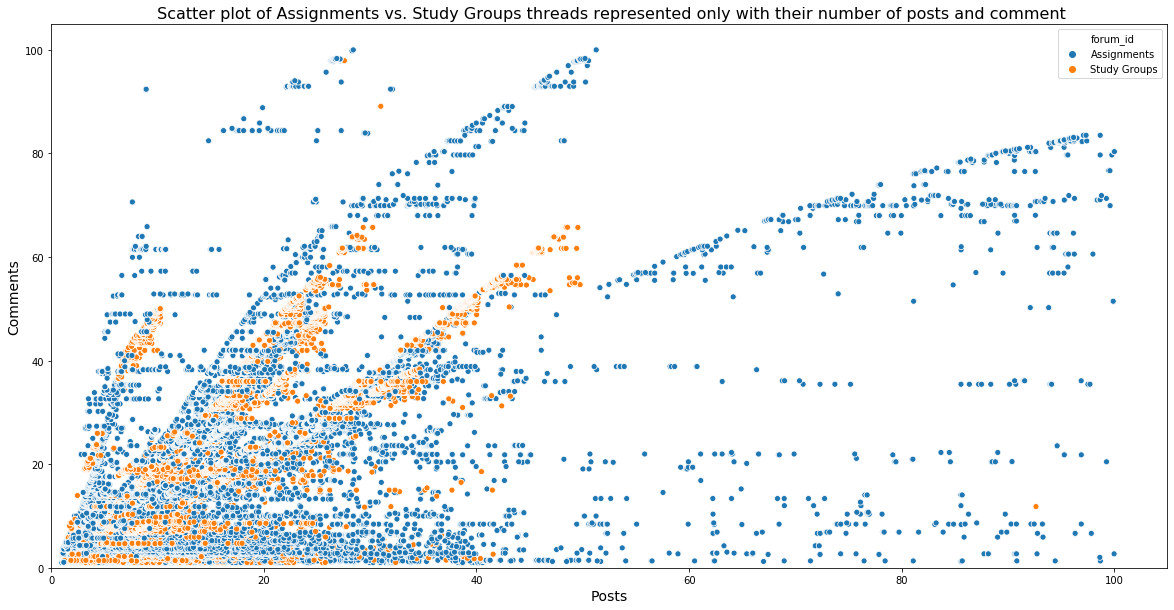

In [17]:
fig, ax = plt.subplots(figsize=(20, 10)) 
sns.scatterplot(x= 'post_id',y = 'thread_id',hue="forum_id", data = info_posts_new,ax=ax)
plt.title(" Scatter plot of Assignments vs. Study Groups threads represented only with their number of posts and comment", size=16) 
plt.ylabel("Comments", size=14)
plt.xlabel("Posts", size=14)
plt.ylim(0, None)
plt.xlim(0, None)

# Graph 5

* Merge all the 3 dataframes.
* Normalise the weeks variable as mentioned in the paper.
* Filter the dataframe on basis of the required sub forum values.
* Rename the values in the forum_id column as per the required sub forum values.
* split the dataframes into 2 different dataframes for  the 2 graphs on the basis of quantitative and Non quantitative courses.

## Issues Faced
* Was not able to replicate the patterns

In [18]:
posts_threads = pd.merge(course_threads, course_posts, on=['thread_id'])
posts_threads[:5]

,thread_id,course_id_x,og_forum,og_forum_id,parent_forum,parent_forum_id,forum_chain,depth,num_views,num_tags,...,course_id_y,parent_id,order,user_id,user_type,post_time,relative_t,votes,num_words,forum_id_y
0,2,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,277,0,...,analysenumerique-001,0,1,0,Anonymous,1358942448,-0.404753,2,23,13
1,2,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,277,0,...,analysenumerique-001,0,2,3992067770,Instructor,1359109877,-0.373994,0,15,13
2,2,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,277,0,...,analysenumerique-001,0,3,3992067770,Instructor,1359129778,-0.370338,1,9,13
3,2,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,277,0,...,analysenumerique-001,0,4,0,Anonymous,1359130161,-0.370267,0,2,13
4,2,analysenumerique-001,"Questions d'ordre technique (coursera, octave,...",13,Forums,0.0,"Forums/ Questions d'ordre technique (coursera,...",2,277,0,...,analysenumerique-001,0,5,3992067770,Instructor,1359214077,-0.354851,0,31,13


In [19]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(course_information[['weeks']])
course_information['weeks'] = pd.DataFrame(x_scaled)
course_information[:5]
#ranges = np.arange(0.0, 1.5, 0.15)
#course_information["weeks"] = pd.qcut(course_information['weeks'], ranges)

,name,course_id,weeks,hours,start_date,end_date,type,language,num_threads,mandatory_posts,num_users
0,Analyse Numérique pour Ingénieurs,analysenumerique-001,0.333333,5,2/18/2013,NaN,Q,FR,119,NaN,103
1,Asset Pricing,assetpricing-001,0.333333,12.5,9/30/2013,NaN,Q,E,673,NaN,392
2,Automata,automata-002,0.083333,9,11/4/2013,NaN,Q,E,429,NaN,493
3,Big Data in Education,bigdata-edu-001,0.250000,7,10/24/2013,NaN,?,E,585,NaN,710
4,Bioinformatics Algorithms (Part 1),bioinformatics-001,0.583333,9,11/4/2013,1/27/2014,Q,E,1160,NaN,941


In [20]:
course_information.columns

Index(['name', 'course_id', 'weeks', 'hours', 'start_date', 'end_date', 'type',
       'language', 'num_threads', 'mandatory_posts', 'num_users'],
      dtype='object')

In [21]:
posts_threads.columns

Index(['thread_id', 'course_id_x', 'og_forum', 'og_forum_id', 'parent_forum',
       'parent_forum_id', 'forum_chain', 'depth', 'num_views', 'num_tags',
       'forum_id_x', 'post_id', 'course_id_y', 'parent_id', 'order', 'user_id',
       'user_type', 'post_time', 'relative_t', 'votes', 'num_words',
       'forum_id_y'],
      dtype='object')

In [22]:
all_combined = pd.merge(course_information[['course_id','weeks','type']], posts_threads[['thread_id','course_id_x','forum_id_x','post_id']], left_on ='course_id', right_on ='course_id_x')
all_combined[:5]

,course_id,weeks,type,thread_id,course_id_x,forum_id_x,post_id
0,analysenumerique-001,0.333333,Q,2,analysenumerique-001,13,3
1,analysenumerique-001,0.333333,Q,2,analysenumerique-001,13,4
2,analysenumerique-001,0.333333,Q,2,analysenumerique-001,13,7
3,analysenumerique-001,0.333333,Q,2,analysenumerique-001,13,8
4,analysenumerique-001,0.333333,Q,2,analysenumerique-001,13,15


In [23]:
all_combined.columns

Index(['course_id', 'weeks', 'type', 'thread_id', 'course_id_x', 'forum_id_x',
       'post_id'],
      dtype='object')

In [24]:
all_combined = all_combined.loc[(all_combined['forum_id_x'] == 2) |(all_combined['forum_id_x'] == 3)
                                |(all_combined['forum_id_x'] == 4)|(all_combined['forum_id_x'] == 7)
                                |(all_combined['forum_id_x'] == 8)|(all_combined['forum_id_x'] == 9)
                                |(all_combined['forum_id_x'] == 100)]

In [25]:
all_combined['forum_id_x'] = all_combined['forum_id_x'].replace(2, 'General (Miscellaneous) Discussion')
all_combined['forum_id_x'] = all_combined['forum_id_x'].replace(3, 'Assignments')
all_combined['forum_id_x'] = all_combined['forum_id_x'].replace(4, 'Study Groups / Meetups')
all_combined['forum_id_x'] = all_combined['forum_id_x'].replace(7, 'Course Feedback / Suggestions')
all_combined['forum_id_x'] = all_combined['forum_id_x'].replace(8, 'Lectures')
all_combined['forum_id_x'] = all_combined['forum_id_x'].replace(9, 'Platform Issues')
all_combined['forum_id_x'] = all_combined['forum_id_x'].replace(100, 'Signature Track')

In [26]:
all_combined['forum_id_x'].unique()

array(['Course Feedback / Suggestions',
       'General (Miscellaneous) Discussion', 'Lectures', 'Assignments',
       'Study Groups / Meetups', 'Platform Issues', 'Signature Track'],
      dtype=object)

In [27]:
all_combined_quantitative = all_combined.loc[(all_combined['type'] == 'Q')]
all_combined_quantitative = all_combined_quantitative.groupby(["forum_id_x", "weeks"]).size().reset_index()
all_combined_quantitative = all_combined_quantitative.sort_values(0,ascending=False)
#all_combined_quantitative["weeks"] = all_combined_quantitative["weeks"].apply(lambda x: x.right)
all_combined_quantitative[:5]

,forum_id_x,weeks,0
3,Assignments,0.250000,882645
25,General (Miscellaneous) Discussion,0.583333,748778
21,General (Miscellaneous) Discussion,0.250000,685111
2,Assignments,0.166667,673564
7,Assignments,0.583333,609485


In [28]:
all_combined_non_quantitative = all_combined.loc[(all_combined['type'] != 'Q') & (all_combined['type'] != '?')]
all_combined_non_quantitative = all_combined_non_quantitative.groupby(["forum_id_x", "weeks"]).size().reset_index()
all_combined_non_quantitative = all_combined_non_quantitative.sort_values(0,ascending=False)
#all_combined_non_quantitative["weeks"] = all_combined_non_quantitative["weeks"].apply(lambda x: x.right)
all_combined_non_quantitative[:5]

,forum_id_x,weeks,0
19,General (Miscellaneous) Discussion,0.250000,830306
1,Assignments,0.083333,736893
43,Study Groups / Meetups,0.083333,573078
28,Lectures,0.416667,459193
30,Lectures,0.583333,340556


Text(0.5, 0, 'Normalized course duration')

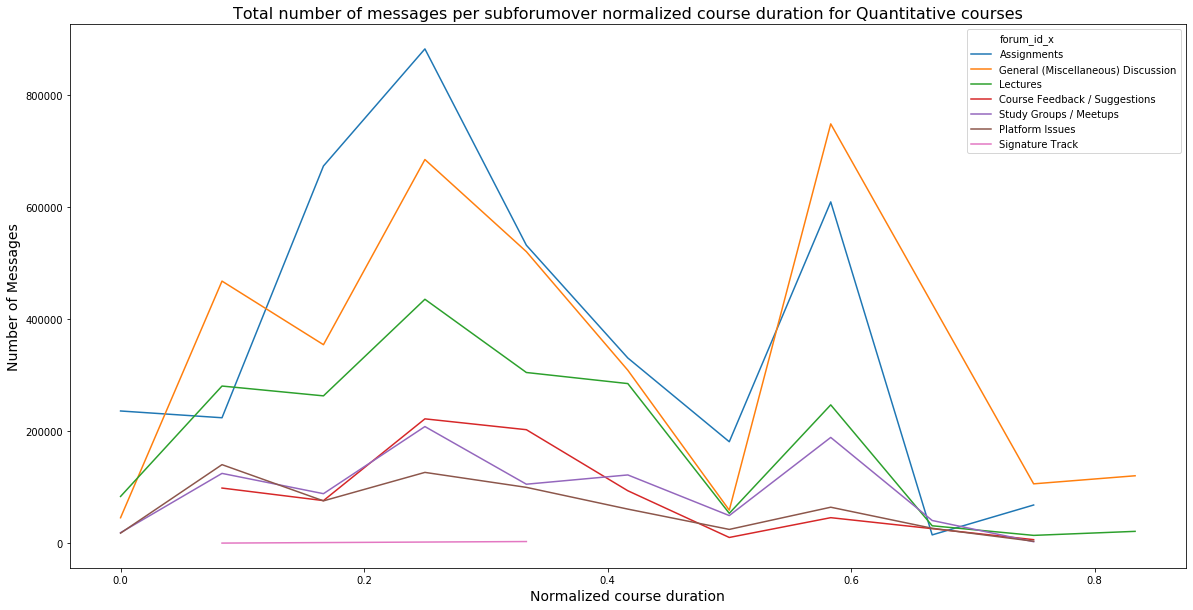

In [29]:
fig, ax = plt.subplots(figsize=(20, 10)) 
sns.lineplot(x= 'weeks',y = 0,hue = "forum_id_x",markers=True, data = all_combined_quantitative, ax=ax, dashes=False)
plt.title("Total number of messages per subforumover normalized course duration for Quantitative courses", size =16)
plt.ylabel("Number of Messages", size=14)
plt.xlabel("Normalized course duration", size=14)

Text(0.5, 0, 'Normalized course duration')

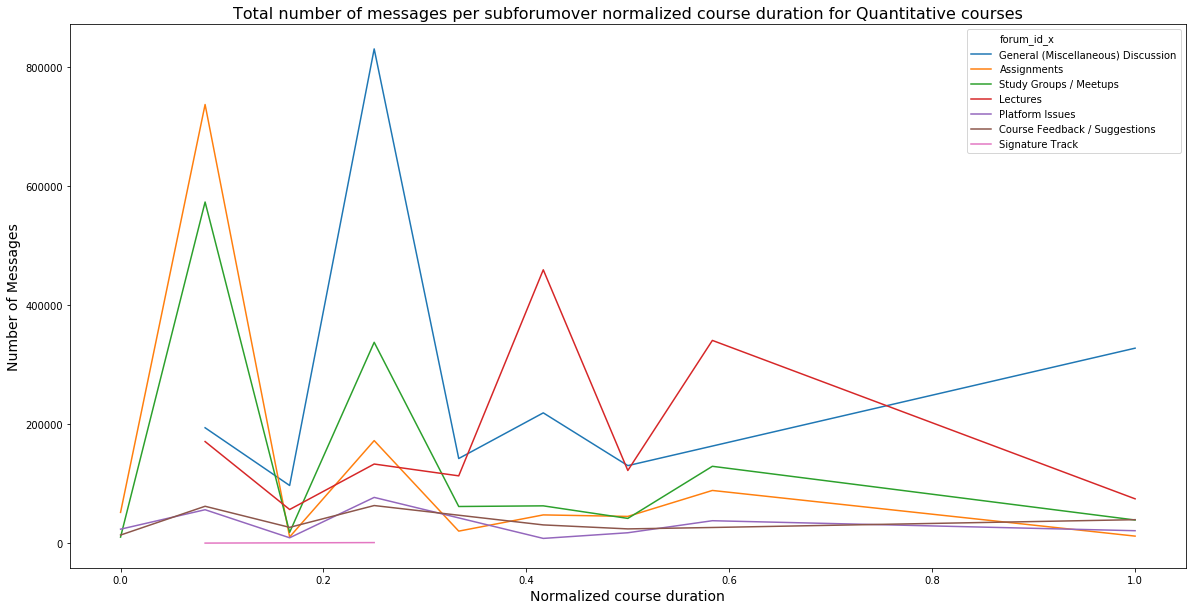

In [30]:
fig, ax = plt.subplots(figsize=(20, 10)) 
sns.lineplot(x= 'weeks',y = 0,hue = "forum_id_x",markers=True, data = all_combined_non_quantitative, ax=ax, dashes=False)
plt.title("Total number of messages per subforumover normalized course duration for Quantitative courses", size =16)
plt.ylabel("Number of Messages", size=14)
plt.xlabel("Normalized course duration", size=14)

# Graph 6

* Normalise and quantize the weeks variable
* filter the data on the basis of user type

## Issues Faced

* Could not split the intervals into 20 values as shown in the paper.

In [31]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(info_posts[['weeks']])
info_posts['weeks'] = pd.DataFrame(x_scaled)

In [32]:
info_posts_sorted = info_posts.loc[(info_posts['user_type'] == 'Anonymous') | (info_posts['user_type'] == 'Student')]
ranges = np.arange(0.0, 1.5, 0.15)
info_posts_sorted["weeks"] = pd.cut(info_posts_sorted['weeks'], ranges)
info_posts_sorted = info_posts_sorted.groupby(["user_type", "weeks"]).size().reset_index()
info_posts_sorted["weeks"] = info_posts_sorted["weeks"].apply(lambda x: x.right)
info_posts_sorted[:5]

C:\Users\abhis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,user_type,weeks,0
0,Anonymous,0.15,14837
1,Anonymous,0.30,25578
2,Anonymous,0.45,11650
3,Anonymous,0.60,10405
4,Anonymous,0.75,192


Text(0.5, 0, 'Normalized course duration')

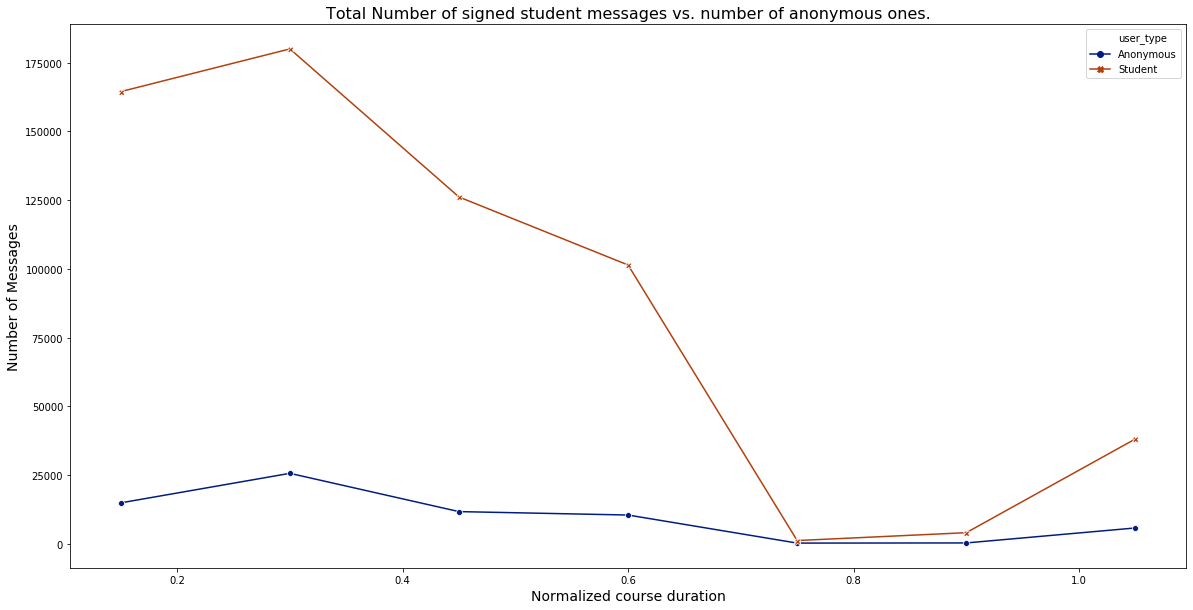

In [33]:
fig, ax = plt.subplots(figsize=(20, 10)) 
palette = sns.color_palette("dark",2)
sns.lineplot(x= 'weeks',y = 0, style="user_type",hue = "user_type",markers=True, data = info_posts_sorted, ax=ax, dashes=False, palette=palette)
plt.title("Total Number of signed student messages vs. number of anonymous ones.", size =16)
plt.ylabel("Number of Messages", size=14)
plt.xlabel("Normalized course duration", size=14)